In [1]:
# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import neurokit2 as nk
from pprint import pprint

# ML
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Custom
import sys,os
sys.path.append( '.' )
sys.path.append( '..' )
import Components.data_fetching as data_fetching
import Components.feature_extraction as feature_extraction

# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(data_fetching)
importlib.reload(feature_extraction)

<module 'Components.feature_extraction' from '../Components/feature_extraction.py'>

# Data Fetching

In [3]:
y = data_fetching.get_train_data(y_only=True)
y = np.ravel(y)

In [4]:
X = feature_extraction.get_features(types=['timeseries', 'heartbeats', 'peaks','hrv'], verbose=True, precomputed='train')
X_test = feature_extraction.get_features(types=['timeseries', 'heartbeats', 'peaks','hrv'], verbose=True, precomputed='test')

# Training

In [5]:
scaler = StandardScaler()
X_2 = scaler.fit_transform(X,y)

clf = xgb.XGBClassifier()
cv_score = cross_val_score(clf, X_2, y, cv=10, scoring='f1_micro')
print(cv_score)
print(np.mean(cv_score))

# 1st attempt
# [0.62304688 0.71875    0.76953125 0.74414062 0.73046875 0.72265625
# 0.7109375  0.7260274  0.72994129 0.66144814]
# 0.7136948079745596

# 2nd attempt
# [0.73242188 0.74023438 0.83007812 0.7578125  0.75976562 0.74804688
# 0.76171875 0.74168297 0.73972603 0.75342466]
# 0.7564911784491194

# 3rd attempt (luke's features)
# [0.72070312 0.76171875 0.82421875 0.76757812 0.78515625 0.75585938
# 0.76171875 0.76125245 0.7592955  0.77299413]
# 0.7670495199363991

# 4th attempt (luke's + lea's features)
# [0.80859375 0.79492188 0.83984375 0.81640625 0.80273438 0.80664062
# 0.81054688 0.78669276 0.7964775  0.82387476]
# 0.8086732509784735

# more ts features + new hrv features 
#[0.81835938 0.8125     0.8671875  0.82617188 0.8359375  0.82421875
# 0.80859375 0.81409002 0.83757339 0.83953033]
#0.828416248776908

[0.81835938 0.8125     0.8671875  0.82617188 0.8359375  0.82421875
 0.80859375 0.81409002 0.83757339 0.83953033]
0.828416248776908


# Predict

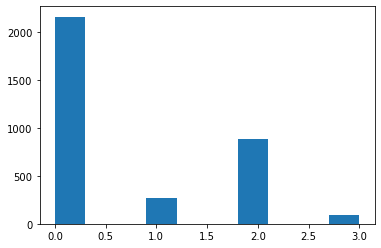

In [6]:
pipe = Pipeline([('scaling',StandardScaler()),
                 ('classification', xgb.XGBClassifier())])

pipe.fit(X,y)
y_pred = pipe.predict(X_test)
plt.hist(y_pred)

y_pred_pd = pd.DataFrame(data=y_pred, columns=["y"])
y_pred_pd.to_csv('../../Predictions/XGB_Standard_All_Features++.csv', index_label='id')